In [1]:
# import necessary libraries
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import re


In [2]:
n = pd.read_csv('네이버.csv')

### 데이터 전처리

In [3]:
#필요 데이터만 뽑은 데이터베이스

df = n[['요일','주문/배송상태','주문일_출고예정','상품명','취소수량','반품수량','상품수량','매출액','주문수량','상품유형']]

In [4]:
# null 값 확인

df.isna().sum()

요일            0
주문/배송상태       0
주문일_출고예정      0
상품명           0
취소수량          0
반품수량          0
상품수량          0
매출액           0
주문수량          0
상품유형        705
dtype: int64

In [5]:
df

,요일,주문/배송상태,주문일_출고예정,상품명,취소수량,반품수량,상품수량,매출액,주문수량,상품유형
0,Friday,배송 완료,7 days,명가 초사리곱창돌김 25gX2EA,0,1,1,0,0,단일 상품
1,Friday,배송 완료,7 days,우리쌀로만든태양초 골드고추장2kg,0,1,1,0,0,단일 상품
2,Friday,배송 완료,7 days,백설 소면 900Gx3개,0,3,1,0,0,묶음 상품
3,Friday,배송 완료,7 days,[네이버] 하선정 멸치액젓 400g,0,1,1,0,0,단일 상품
4,Saturday,배송 완료,3 days,백설 갈색설탕 3KGx6개 (총 18KG),0,0,1,34110,6,묶음 상품
...,...,...,...,...,...,...,...,...,...,...
152453,Sunday,배송 완료,2 days,햇반솥반 전 제품(8종) 체험팩,0,0,1,3841,1,복합 상품
152454,Sunday,배송 완료,2 days,햇반 210G 6개,0,0,2,11460,2,단일 상품
152455,Sunday,배송 완료,1 days,비비고 차돌된장찌개 460Gx5개,0,0,1,21510,5,묶음 상품
152456,Sunday,배송 완료,1 days,비비고 돼지고기김치찌개 460Gx5개,0,0,1,21800,5,묶음 상품


In [6]:
#필요 데이터 재수정

df_4 = df[['요일','상품명','상품수량','취소수량','반품수량','매출액','상품유형']]

In [7]:
df_4

,요일,상품명,상품수량,취소수량,반품수량,매출액,상품유형
0,Friday,명가 초사리곱창돌김 25gX2EA,1,0,1,0,단일 상품
1,Friday,우리쌀로만든태양초 골드고추장2kg,1,0,1,0,단일 상품
2,Friday,백설 소면 900Gx3개,1,0,3,0,묶음 상품
3,Friday,[네이버] 하선정 멸치액젓 400g,1,0,1,0,단일 상품
4,Saturday,백설 갈색설탕 3KGx6개 (총 18KG),1,0,0,34110,묶음 상품
...,...,...,...,...,...,...,...
152453,Sunday,햇반솥반 전 제품(8종) 체험팩,1,0,0,3841,복합 상품
152454,Sunday,햇반 210G 6개,2,0,0,11460,단일 상품
152455,Sunday,비비고 차돌된장찌개 460Gx5개,1,0,0,21510,묶음 상품
152456,Sunday,비비고 돼지고기김치찌개 460Gx5개,1,0,0,21800,묶음 상품


In [8]:
# [] 삭제

df_4 = df_4[~df_4['상품명'].str.contains('\[[^)]+\]', na=False, case=False)]

In [9]:
# 상품명과 무게 및 갯수만 남겨두기 (/ 삭제)

df_4['상품명']=df_4['상품명'].str.replace(pat=r'[/_()]+', repl= r' ', regex=True)

C:\Users\minji\AppData\Local\Temp\ipykernel_43644\4170707397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['상품명']=df_4['상품명'].str.replace(pat=r'[/_()]+', repl= r' ', regex=True)


In [10]:
df_4

,요일,상품명,상품수량,취소수량,반품수량,매출액,상품유형
0,Friday,명가 초사리곱창돌김 25gX2EA,1,0,1,0,단일 상품
1,Friday,우리쌀로만든태양초 골드고추장2kg,1,0,1,0,단일 상품
2,Friday,백설 소면 900Gx3개,1,0,3,0,묶음 상품
4,Saturday,백설 갈색설탕 3KGx6개 총 18KG,1,0,0,34110,묶음 상품
6,Saturday,햇반 귀리흑미곤약밥 150gx12번들,1,0,0,24220,단일 상품
...,...,...,...,...,...,...,...
152453,Sunday,햇반솥반 전 제품 8종 체험팩,1,0,0,3841,복합 상품
152454,Sunday,햇반 210G 6개,2,0,0,11460,단일 상품
152455,Sunday,비비고 차돌된장찌개 460Gx5개,1,0,0,21510,묶음 상품
152456,Sunday,비비고 돼지고기김치찌개 460Gx5개,1,0,0,21800,묶음 상품


In [11]:
# 주문수량에서 취소와 반품수량을 빼 실제로 판매된 수량만 만듦

df_4['실판매수량'] = df_4['상품수량'] - df_4['취소수량'] - df_4['반품수량']

C:\Users\minji\AppData\Local\Temp\ipykernel_43644\134617171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['실판매수량'] = df_4['상품수량'] - df_4['취소수량'] - df_4['반품수량']


In [12]:
# 상품 유형 원핫인코딩

df_4 = pd.get_dummies(df_4, columns = ['상품유형'])

In [13]:
# 매출액이 큰 순서대로 정렬

df_4.sort_values('매출액', ascending = False)

,요일,상품명,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품
8643,Wednesday,다시다 쇠고기 25kg,20,0,0,5312000,20,1,0,0
8652,Wednesday,다시다 쇠고기 25kg,10,0,0,2646500,10,1,0,0
44246,Monday,다시다 쇠고기 25kg,6,0,0,1583900,6,1,0,0
119309,Sunday,다시다 쇠고기 25kg,5,0,0,1372500,5,1,0,0
8617,Wednesday,다시다 쇠고기 25kg,5,0,0,1328250,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
79637,Tuesday,맥스봉 핫바 숯불구이 10개+직화구이 10개,1,10,0,0,-9,0,0,1
25692,Friday,햇반 발아현미밥 210Gx24개,1,8,0,0,-7,0,1,0
79647,Tuesday,비비고 순살고등어구이 60Gx10개,1,10,0,0,-9,0,1,0
25662,Friday,햇반 발아현미밥 210Gx24개,1,8,0,0,-7,0,1,0


### 1. 요일별 매출액 추이

- 가장 높음 : 월요일 -> 묶음 상품 판매가 가장 높음
- 가장 낮음 : 금,토 -> 주문수량에 비례하여 취소 및 반품이 높음

In [14]:
#요일 별 매출액 추이

df_4_1 = df_4.groupby('요일').sum().sort_values('매출액', ascending = False)

# 대체적으로 모든 요일의 묶음상품 구매 비율이 높다 -> 마트에서 사기 어려움

C:\Users\minji\AppData\Local\Temp\ipykernel_43644\3880939880.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4_1 = df_4.groupby('요일').sum().sort_values('매출액', ascending = False)


In [15]:
# 요일별 반품율

df_4_1['반품율'] = (df_4_1['취소수량'] + df_4_1['반품수량'])/df_4_1['상품수량']*100

# 일, 금, 토 순으로 높다. -> 고객들이 마음을 돌리지 못 할, 고객을 가둘 매력적인 프로모션 필요

In [16]:
df_4_1

,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,반품율
요일,,,,,,,,,
Monday,28557,6129,746,635915780,21682,5555,16726,2032,24.074658
Wednesday,25831,4814,497,539527860,20520,7033,10672,3765,20.560567
Tuesday,23839,5232,807,481402190,17800,4980,11424,3161,25.332438
Sunday,13116,3411,691,297860060,9014,2955,6565,1547,31.274779
Thursday,13840,3280,438,293188520,10122,3238,5735,2546,26.864162
Friday,10727,2575,491,231236540,7661,2505,4719,1571,28.582083
Saturday,8628,2175,240,194250700,6213,2126,3948,1007,27.990264


<BarContainer object of 7 artists>

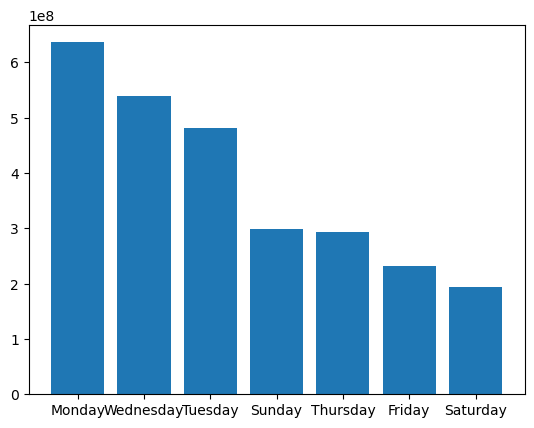

In [17]:
# 요일 별 매출액 그래프

요일 = df_4_1.index
매출액 = df_4_1['매출액']

plt.bar(요일, 매출액)

### 2. 상품별 가장 많이 팔린 요일

In [18]:
# 요일 원핫인코딩

df_5 = pd.get_dummies(df_4, columns = ['요일'])

In [19]:
df_5

,상품명,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
0,명가 초사리곱창돌김 25gX2EA,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,우리쌀로만든태양초 골드고추장2kg,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,백설 소면 900Gx3개,1,0,3,0,-2,0,1,0,1,0,0,0,0,0,0
4,백설 갈색설탕 3KGx6개 총 18KG,1,0,0,34110,1,0,1,0,0,0,1,0,0,0,0
6,햇반 귀리흑미곤약밥 150gx12번들,1,0,0,24220,1,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152453,햇반솥반 전 제품 8종 체험팩,1,0,0,3841,1,0,0,1,0,0,0,1,0,0,0
152454,햇반 210G 6개,2,0,0,11460,2,1,0,0,0,0,0,1,0,0,0
152455,비비고 차돌된장찌개 460Gx5개,1,0,0,21510,1,0,1,0,0,0,0,1,0,0,0
152456,비비고 돼지고기김치찌개 460Gx5개,1,0,0,21800,1,0,1,0,0,0,0,1,0,0,0


In [20]:
# 월요일에 가장 많이 팔린 상품은?

df_5.groupby('상품명').sum().sort_values('요일_Monday', ascending = False)

## 자취생들이 많이 사가는 스팸 n개와 햇반이 가장 많음

,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
상품명,,,,,,,,,,,,,,,
스팸클래식 200Gx10개,11099,2400,69,231326050,8630,0,10608,0,248,6957,238,376,270,1541,978
햇반 210Gx24개,15037,248,29,333002320,14760,13728,0,0,1303,2476,1080,1380,1561,2286,3642
햇반 작은공기130G x 36개,5646,2988,1055,161459740,1603,0,5285,0,389,986,370,1428,462,797,853
햇반 발아현미밥 210Gx36개,3930,2952,289,149440900,689,0,3680,0,349,707,304,401,435,738,746
햇반 100%현미로 지은밥 130Gx36개 1BOX,1918,1692,360,67792380,-134,0,1851,0,130,667,103,251,144,278,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04.비비고 소고기무국 500Gx6개,1,0,0,30380,1,0,1,0,0,0,0,0,0,0,1
비비고 순살삼치구이 60x12개,1,0,0,44160,1,0,1,0,0,0,0,0,0,1,0
비비고 순살 생선구이 12개 고등어 삼치,8,0,0,164220,8,0,0,6,0,0,0,2,0,0,4


### 3. 매출액 상위, 매출액 하위

- 상위 : 햇반, 스팸, 
- 하위 : 소프트밀, 깨찰빵 믹스 등

In [21]:
# 매출액 상위 30개

df_5.groupby('상품명').sum().sort_values('매출액', ascending = False).head(30)

# 대용량, 자취생들이 편하게 먹기 좋은 물품들

,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
상품명,,,,,,,,,,,,,,,
햇반 210Gx24개,15037,248,29,333002320,14760,13728,0,0,1303,2476,1080,1380,1561,2286,3642
스팸클래식 200Gx10개,11099,2400,69,231326050,8630,0,10608,0,248,6957,238,376,270,1541,978
햇반 작은공기130G x 36개,5646,2988,1055,161459740,1603,0,5285,0,389,986,370,1428,462,797,853
햇반 발아현미밥 210Gx36개,3930,2952,289,149440900,689,0,3680,0,349,707,304,401,435,738,746
햇반 흑미밥 210Gx36개,2920,2916,144,108403500,-140,0,2745,0,233,577,234,325,314,514,548
햇반큰공기300G x 18개,3131,648,91,87173720,2392,0,2538,0,249,542,157,238,307,527,518
햇반 매일잡곡밥 210Gx36개,2231,972,288,85592290,971,0,2111,0,202,510,163,250,273,357,356
다시다 쇠고기 25kg,303,8,1,79493920,294,222,0,0,14,60,43,45,24,15,21
햇반 백미 205Gx36개,2565,39,14,78895760,2512,2352,0,0,166,540,121,279,309,367,570


In [22]:
# 매출액 하위 30개

df_5.groupby('상품명').sum().sort_values('매출액', ascending = False).tail(30)

# 주변 편의점이나 마트에서 사기 쉬운 물품들

,상품수량,취소수량,반품수량,매출액,실판매수량,상품유형_단일 상품,상품유형_묶음 상품,상품유형_복합 상품,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
상품명,,,,,,,,,,,,,,,
더건강한 닭가슴살 소시지 꼬치 80g,3,0,0,7680,3,2,0,0,0,1,0,0,1,0,0
우동 면사리 190g,6,0,0,6940,6,3,0,0,1,1,0,0,0,1,0
EXCYCLE 바삭칩 핫스파이시 45Gx3개,1,0,0,6750,1,0,1,0,0,0,0,0,0,0,1
CJ 행복한콩 순두부 330Gx1개,3,0,0,6090,3,1,0,0,0,0,0,1,0,0,0
행복한콩 2가지로만 국산콩 찌개용두부 180G,3,0,0,5340,3,1,0,0,0,0,0,1,0,0,0
백설 토마토라구파스타소스 375G,1,0,0,5020,1,1,0,0,0,1,0,0,0,0,0
백설 트러플크림파스타소스 355G,1,0,0,5020,1,1,0,0,0,1,0,0,0,0,0
즐거운동행미정당 순쌀떡볶이 401.2G,1,0,0,4980,1,1,0,0,0,0,0,0,0,0,1
즐거운동행 가벼운 고단백 쌈두부 사각면 100G,2,0,0,4780,2,1,0,0,0,0,0,0,0,1,0


### 4.  특정 요일에 가장 많이, 적게 팔린 상품
- 상품 top 10, bottom 10 추출
- 시각화

In [23]:
# 월요일과 목요일에 가장 많이 팔린 상품 top 10
monday_top10 = df_5[df_5['요일_Monday'] == 1]['상품명'].value_counts().nlargest(10)
thursday_top10 = df_5[df_5['요일_Thursday'] == 1]['상품명'].value_counts().nlargest(10)

# 금요일과 토요일에 가장 많이 팔린 상품 top 10
friday_top10 = df_5[df_5['요일_Friday'] == 1]['상품명'].value_counts().nlargest(10)
saturday_top10 = df_5[df_5['요일_Saturday'] == 1]['상품명'].value_counts().nlargest(10)

In [24]:
# 월요일 많이 팔린 상품 리스트
monday_top10 

스팸클래식 200Gx10개                    6957
햇반 210Gx24개                       2476
햇반 작은공기130G x 36개                  986
햇반 발아현미밥 210Gx36개                  707
햇반 100%현미로 지은밥 130Gx36개  1BOX      667
햇반 흑미밥 210Gx36개                    577
햇반큰공기300G x 18개                    542
햇반 백미 205Gx36개                     540
햇반210Gx36개                         532
햇반 매일잡곡밥 210Gx36개                  510
Name: 상품명, dtype: int64

In [25]:
# 목요일 많이 팔린 상품 리스트
thursday_top10

햇반 210Gx24개                          1561
비비고?왕교자 1.05KGx2개+김치왕교자 1.05KGx2개     834
햇반 작은공기130G x 36개                     462
햇반 발아현미밥 210Gx36개                     435
햇반 흑미밥 210Gx36개                       314
햇반 백미 205Gx36개                        309
햇반큰공기300G x 18개                       307
비비고 왕교자 6봉+한섬 2봉+매운왕교자 2봉             288
햇반 매일잡곡밥 210Gx36개                     273
스팸클래식 200Gx10개                        270
Name: 상품명, dtype: int64

In [26]:
# 금요일 많이 팔린 상품 리스트
friday_top10

햇반 210Gx24개                  1303
햇반 작은공기130G x 36개             389
고메 스윗치즈2판+토마토치즈2판+갈릭치즈2판      357
햇반 발아현미밥 210Gx36개             349
햇반큰공기300G x 18개               249
스팸클래식 200Gx10개                248
햇반 흑미밥 210Gx36개               233
햇반210Gx36개                    233
비비고 왕교자 6봉+한섬 2봉+매운왕교자 2봉     231
비비고 사골곰탕 500Gx18개             209
Name: 상품명, dtype: int64

In [27]:
# 토요일 많이 팔린 상품 리스트
saturday_top10

햇반 210Gx24개                          1080
햇반 작은공기130G x 36개                     370
햇반 발아현미밥 210Gx36개                     304
스팸클래식 200Gx10개                        238
햇반 흑미밥 210Gx36개                       234
비비고 사골곰탕 500Gx18개                     185
햇반 매일잡곡밥 210Gx36개                     163
햇반큰공기300G x 18개                       157
비비고?왕교자 1.05KGx2개+김치왕교자 1.05KGx2개     134
햇반 백미 205Gx36개                        121
Name: 상품명, dtype: int64

In [28]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

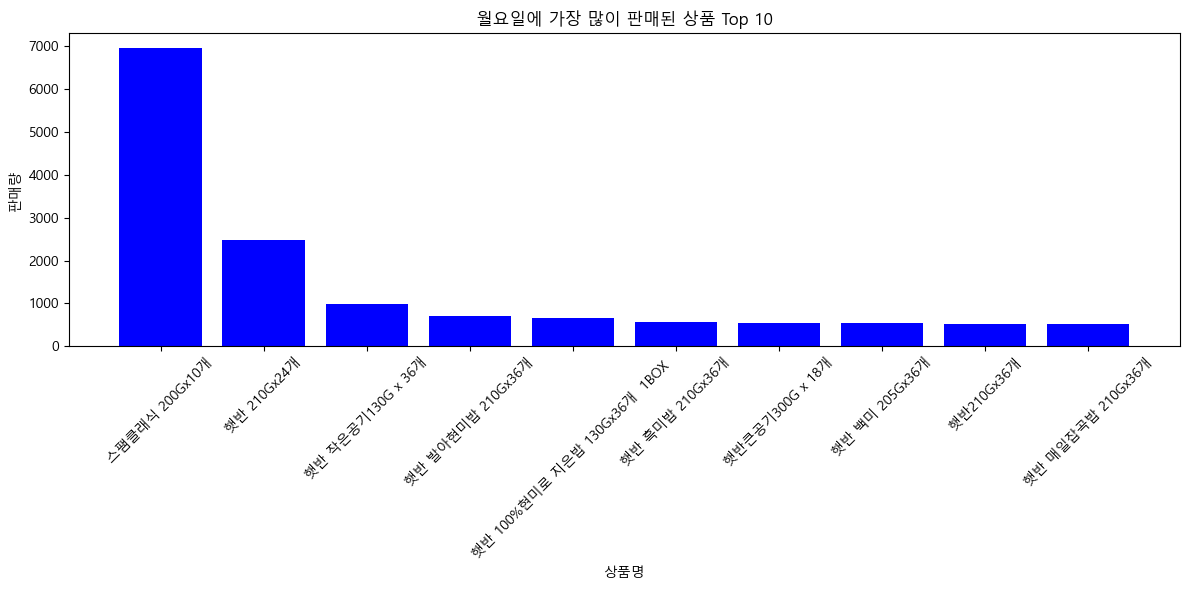

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # "맑은 고딕" 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


# 월요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(monday_top10.index, monday_top10.values, color='blue')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('월요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


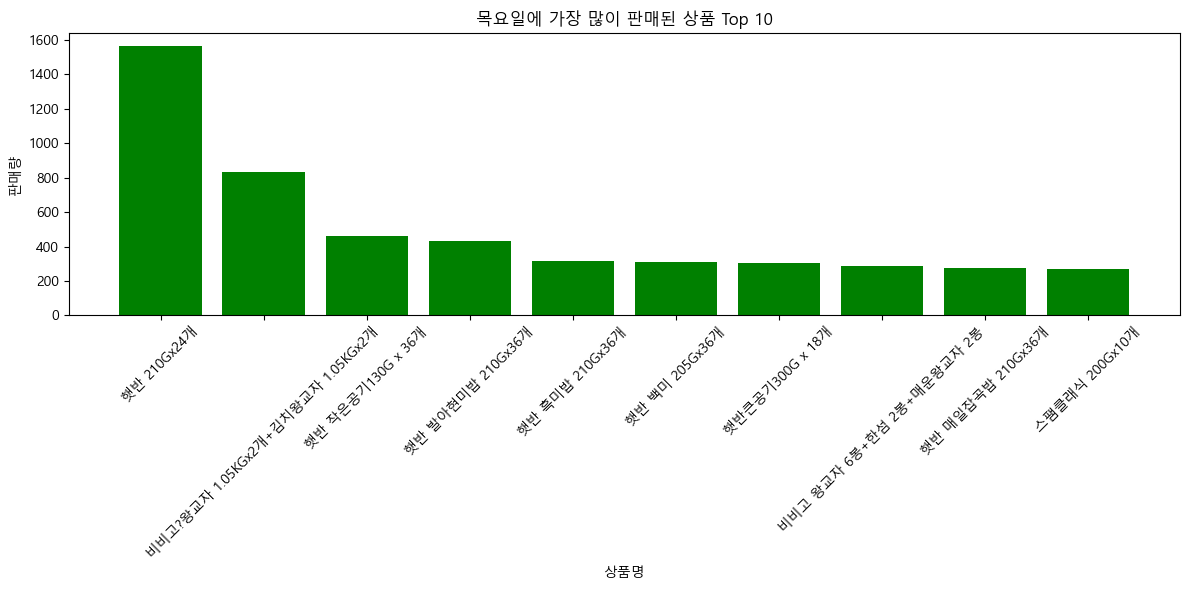

In [30]:
# 목요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(thursday_top10.index, thursday_top10.values, color='green')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('목요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

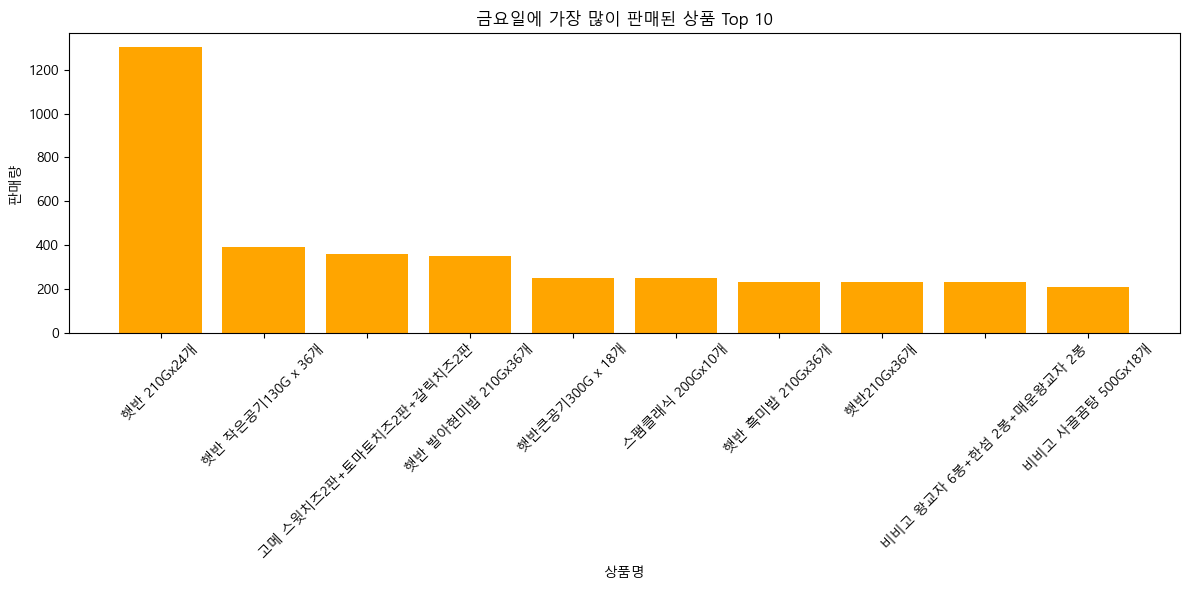

In [31]:
# 금요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(friday_top10.index, friday_top10.values, color='orange')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('금요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

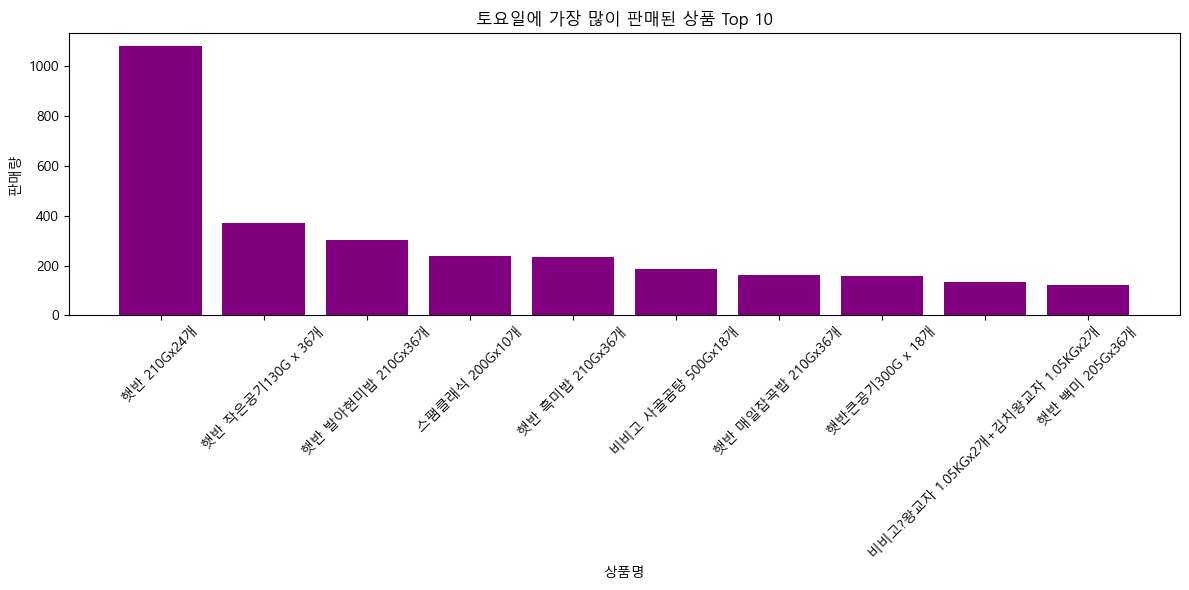

In [32]:
# 토요일에 가장 많이 팔린 상품 top 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(saturday_top10.index, saturday_top10.values, color='purple')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('토요일에 가장 많이 판매된 상품 Top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# 월요일에 가장 적게 팔린 상품 bottom 10
monday_bottom10 = df_5[df_5['요일_Monday'] == 1]['상품명'].value_counts().nsmallest(10)
# 목요일에 가장 적게 팔린 상품 bottom 10
thursday_bottom10 = df_5[df_5['요일_Thursday'] == 1]['상품명'].value_counts().nsmallest(10)
# 금요일에 가장 적게 팔린 상품 bottom 10
friday_bottom10 = df_5[df_5['요일_Friday'] == 1]['상품명'].value_counts().nsmallest(10)
# 토요일에 가장 적게 팔린 상품 bottom 10
saturday_bottom10 = df_5[df_5['요일_Saturday'] == 1]['상품명'].value_counts().nsmallest(10)

In [34]:
# 월요일 적게 팔린 상품 bottom 10
monday_bottom10

햇반 컵반 황태국밥 170Gx18개             1
햇반컵반 낙지콩나물비빔밥 216Gx18개 1box     1
햇반 컵반 스팸김치덮밥 251Gx18개           1
고메 베이커리 크로와상 330Gx3개            1
비비고 우리아이한입 썰은김치 270Gx6개         1
비비고 포기배추김치 900Gx3개              1
비비고 누룽지닭다리삼계탕 600Gx3개           1
햇반 쿡반 불고기비빔밥 410Gx4개            1
비비고 플랜테이블 떡갈비 450Gx3개           1
CJ 숯불향바베큐바 280Gx2개              1
Name: 상품명, dtype: int64

In [35]:
# 목요일 적게 팔린 상품 bottom 10
thursday_bottom10

명가 직화돌김 4.5Gx16EA         1
다담 국물떡볶이양념 145Gx10개       1
고메 삼선해물볶음밥 8인분 420g*4     1
신비비고 도톰해물완자 795G          1
백설 소갈비양념 500Gx5개          1
얼티브 오리지널 190mlx24입 박스     1
고메 나폴리 마르게리타 피자 325G      1
고메 치즈크리스피핫도그 340g         1
해찬들 구수한 집된장 3KGx2개        1
CJ 행복한콩 콩비지 320Gx4개       1
Name: 상품명, dtype: int64

In [36]:
# 금요일에 가장 적게 팔린 상품 bottom 10
friday_bottom10

햇반쿡반 버터장조림주먹밥 500Gx3개           1
햇반 컵반 직화볶음짜장덮밥 281Gx6개          1
백설 베이컨까르보나라파스타소스 355G           1
고메 베이커리 크림치즈파이 370G             1
햇반 쿡반 참치마요주먹밥 500Gx3개           1
비비고 우리아이한입 썰은김치270Gx5개          1
밸런스밀 프로틴쉐이크 카카오 50G 일주일팩 7개     1
EXCYCLE 바삭칩 오리지널 45Gx3개         1
맥스봉 청양고추 후랑크 80Gx5개             1
플랜테이블 왕교자 420Gx2개               1
Name: 상품명, dtype: int64

In [37]:
# 토요일에 가장 적게 팔린 상품 bottom 10
saturday_bottom10

비비고 플랜테이블 떡갈비 450G                1
스팸 싱글25%라이트 80Gx10개               1
백설 해바라기씨유 900MLx2개                1
플랜테이블 토마토미트볼 165Gx10개             1
비비고 왕교자 315Gx10개                  1
비비고 언양식 바싹불고기 460Gx3개             1
플랜테이블 함박스테이크 150g 5+5개  총 10개     1
해찬들 물로만 끓여도 부드럽고 순한 미소된장 450G     1
비건다시다 콩으로 만든 쇠고기향 가득 60g          1
쉐프솔루션 탕수육 1KG                     1
Name: 상품명, dtype: int64

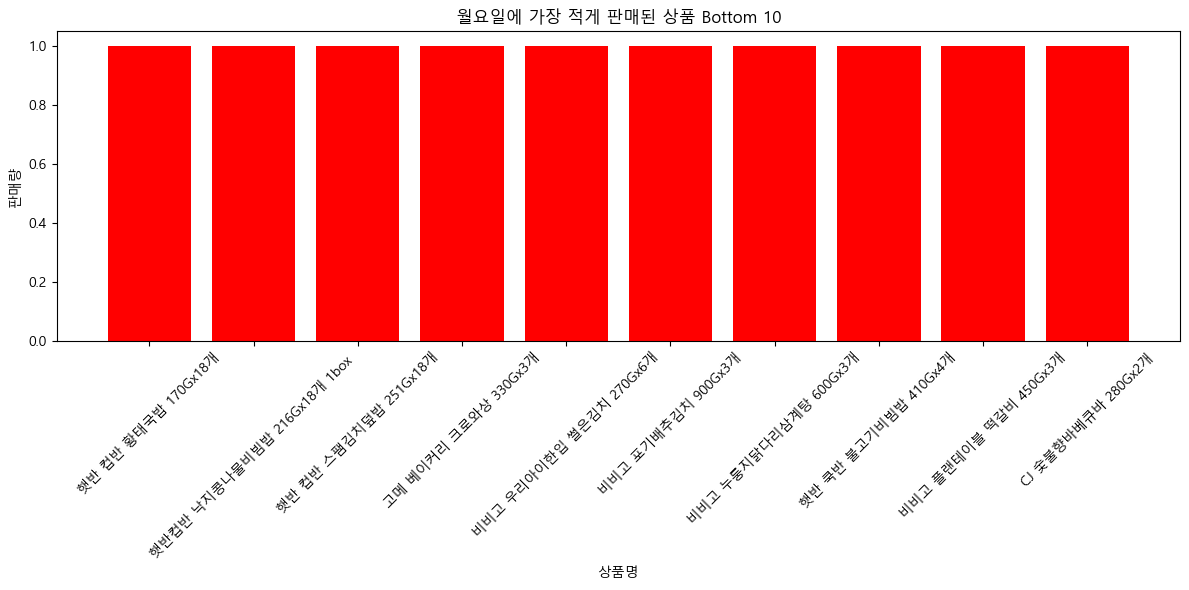

In [38]:
# 월요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(monday_bottom10.index, monday_bottom10.values, color='red')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('월요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

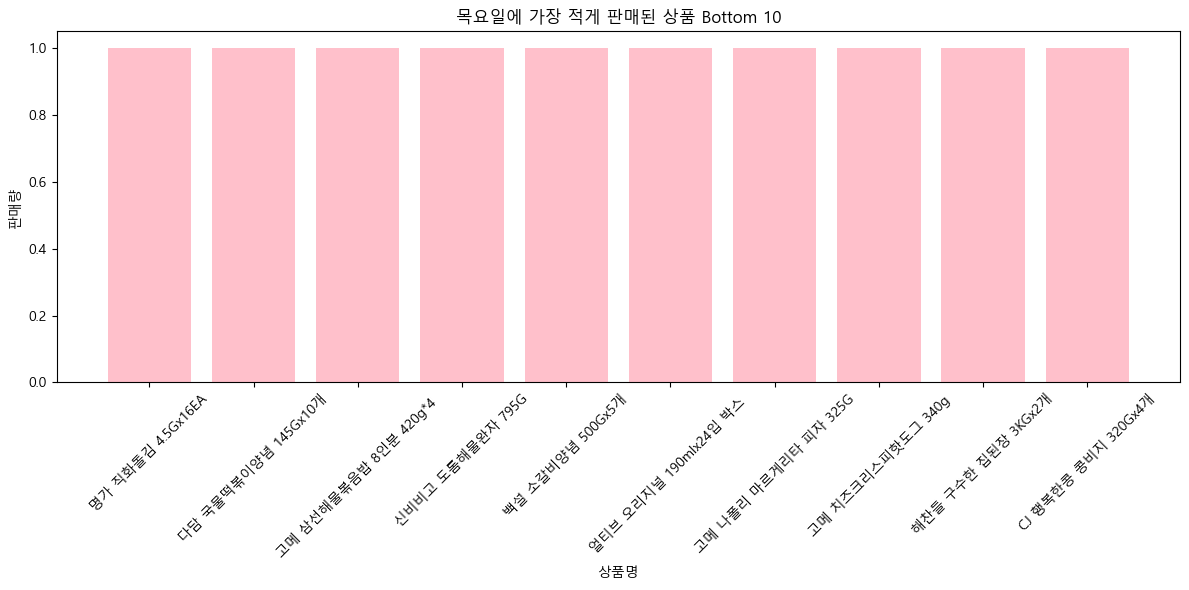

In [39]:
# 목요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(thursday_bottom10.index, thursday_bottom10.values, color='pink')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('목요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

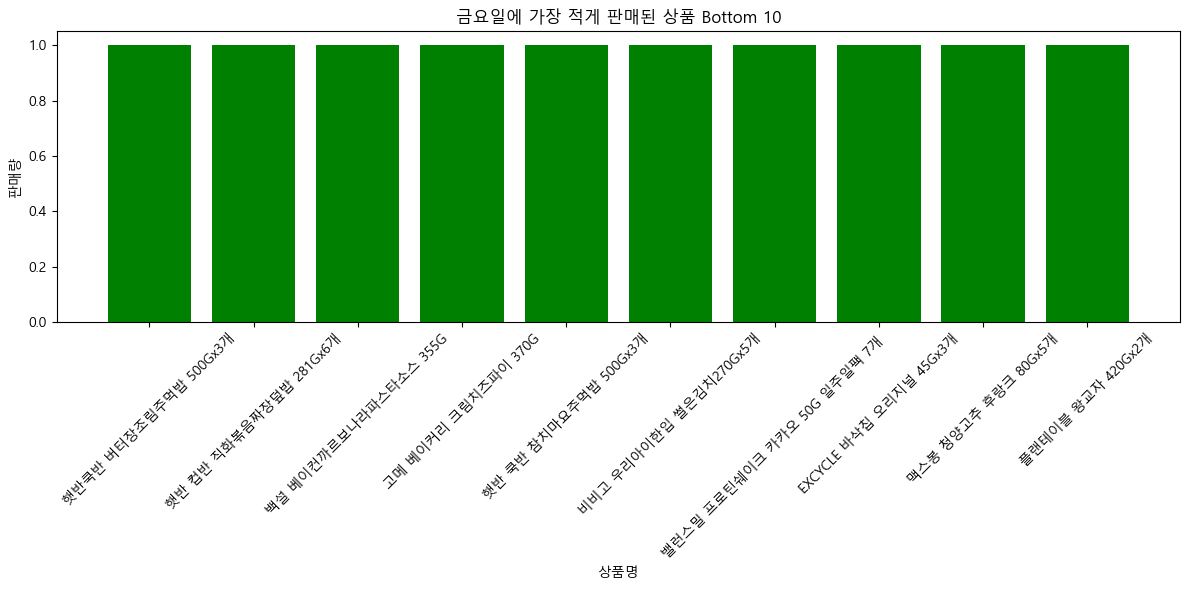

In [40]:
# 금요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(friday_bottom10.index, friday_bottom10.values, color='green')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('금요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

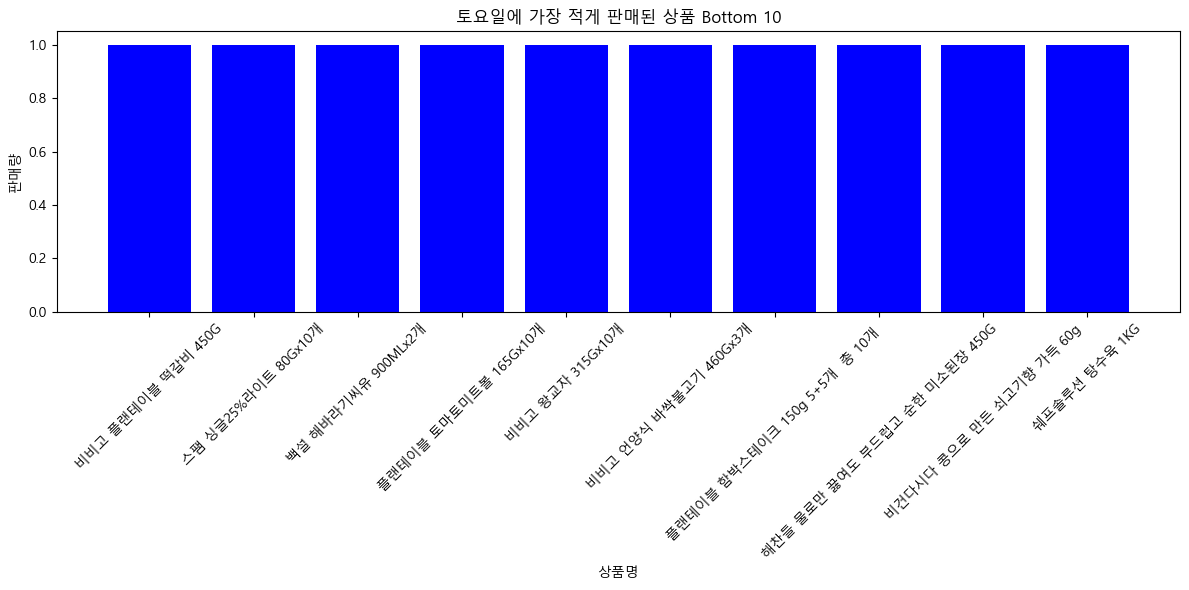

In [41]:
# 토요일에 가장 적게 팔린 상품 bottom 10 그래프
plt.figure(figsize=(12, 6))
plt.bar(saturday_bottom10.index, saturday_bottom10.values, color='Blue')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.title('토요일에 가장 적게 판매된 상품 Bottom 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()